In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [2]:
CBxs = pd.read_csv('C:/Users/Emily/Desktop/screens/CB4856_screen/CBMM.csv', index_col=0)
comps = CBxs.columns.tolist()
comps.remove('Empty:Empty')
print(str(len(comps)))

43


In [3]:
N2xs = pd.read_csv('C:/Users/Emily/Documents/S1/S1_xs3.csv', usecols=comps)

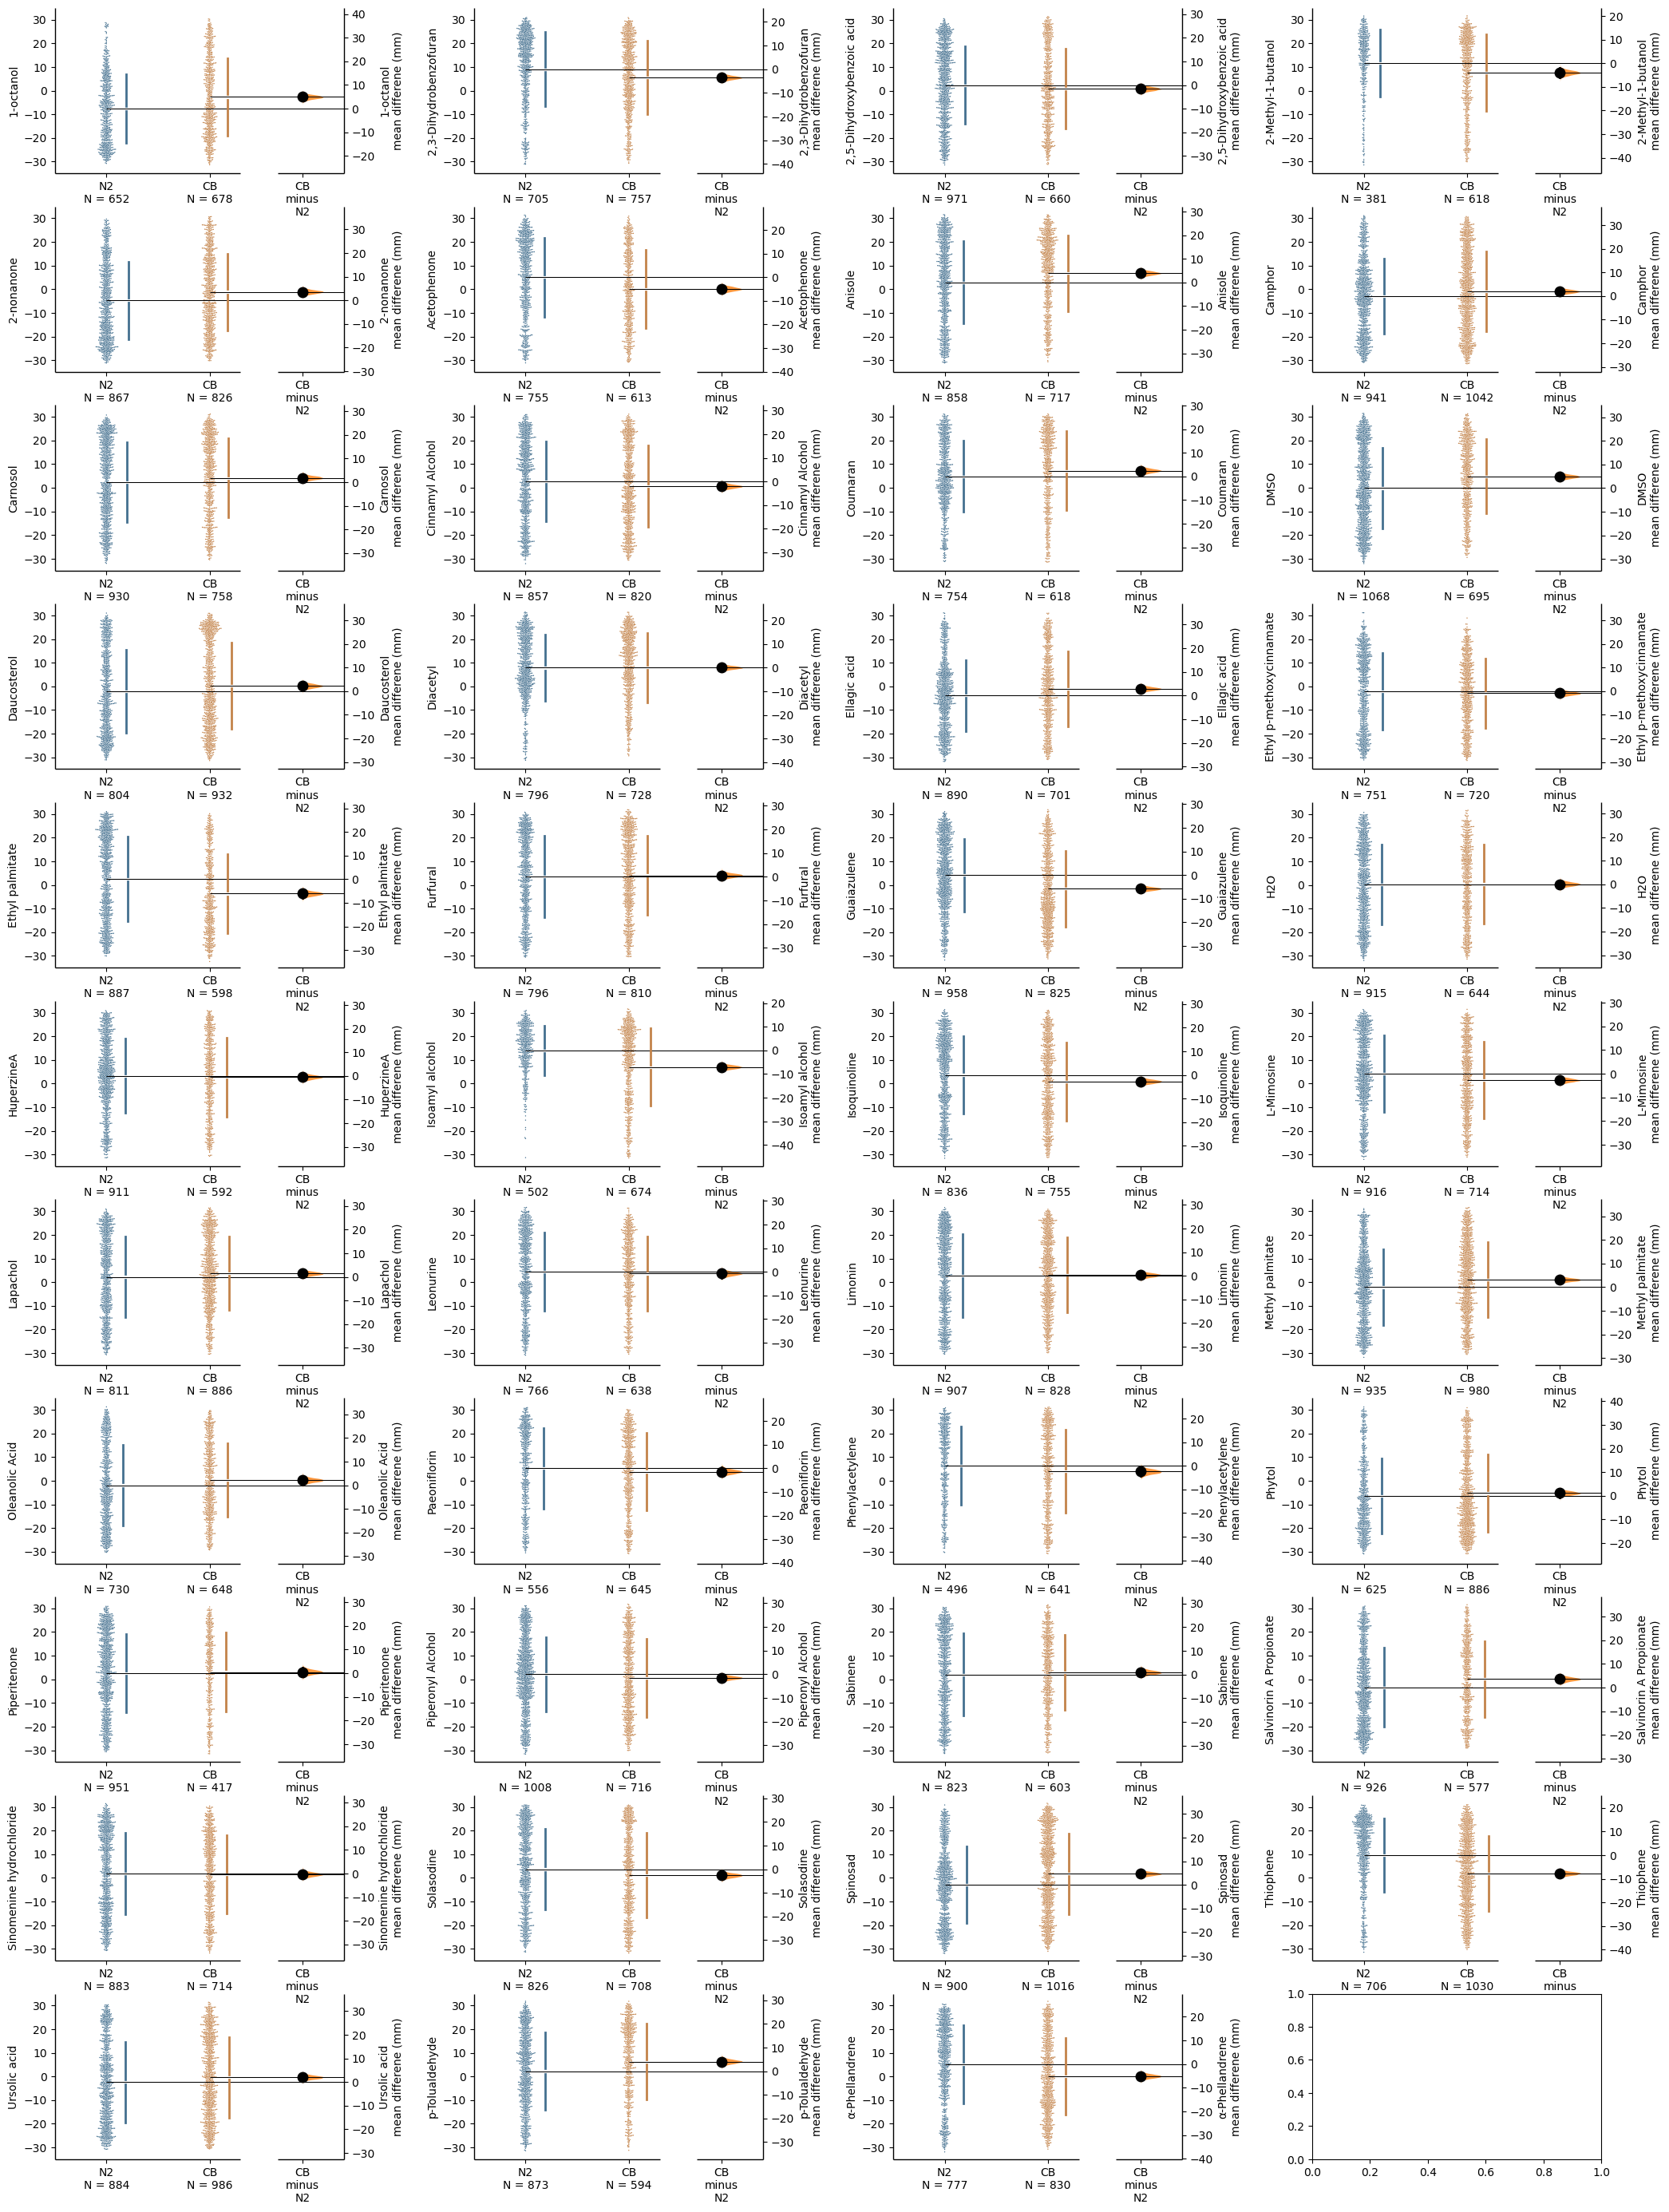

In [5]:
f, axx = plt.subplots(nrows=11, ncols=4,
                    figsize=(25, 35),
                    gridspec_kw={'wspace': 0.45})

i=0


all_res = pd.DataFrame()
for c in comps:
    N2 = N2xs[c]
    CB = CBxs[c]
    df = pd.DataFrame({'N2':N2, 'CB':CB})
    db_obj = db.load(df, idx=(['N2', 'CB']))
    mm_plot = db_obj.mean_diff.plot(raw_marker_size=1, swarm_label = c, 
        contrast_label= c + "\nmean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35), ax=axx.flat[i])
    res = db_obj.mean_diff.results
    res['Compound'] = c
    all_res = all_res.append(res)
    i += 1
#plt.savefig('C:/Users/Emily/Desktop/CB4856_screen/CBxN2plots.png')

In [139]:
sort_res = all_res.sort_values(by='difference').reset_index()
#all_res.to_csv('C:/Users/Emily/Desktop/CB4856_screen/n2vcb_mdiff.csv')

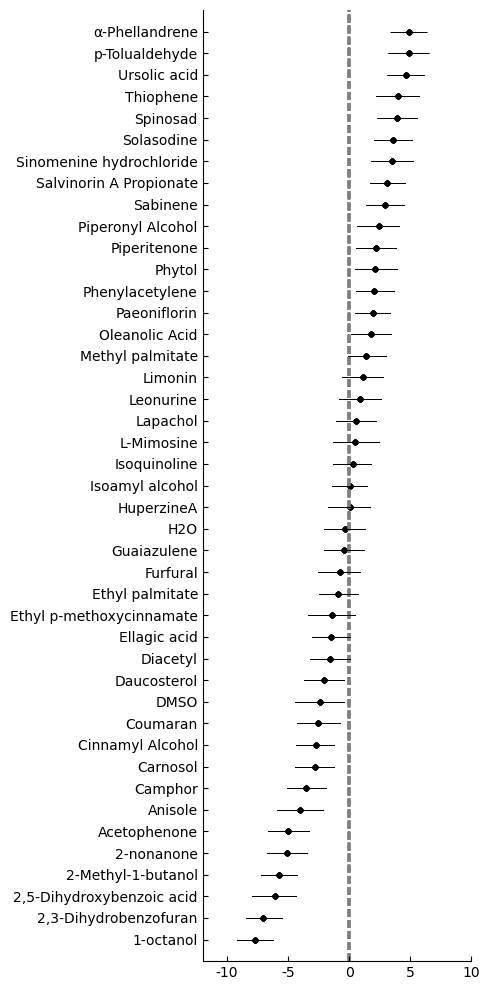

In [8]:
fig, ax = plt.subplots(figsize=(5,10)) 

positions = list(range(0, len(comps)))

lines = []

for index, row in sort_res.iterrows():
    line = ((row['bca_low'], index), (row['bca_high'], index))
    lines.append(line)


    ytick_labels = comps

    mdiffs = list(sort_res['difference'])

    hln_coll = mpl.collections.LineCollection(lines, colors='black', linewidths = .7)

    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    ax.axvline(0, ls='--', c='gray', zorder=1)
    #ax.fill_betweenx(positions, sub['bca_low'], sub['bca_high'], alpha=.25, joinstyle='round')
    ax.add_collection(hln_coll)
    ax.scatter(mdiffs, positions, s=8, c='black')
    ax.tick_params(axis='both', tickdir='in')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim(-12,10)    
    ax.set_ylim(-1, len(comps))


    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('C:/Users/Emily/Desktop/CB4856_screen/CB4856_cis.png', dpi=300)

In [4]:
CBxs = CBxs.drop(['Empty:Empty'], axis=1)

In [5]:
ntomelt = N2xs[N2xs.columns.intersection(comps)]
n2_melt = pd.melt(ntomelt, var_name='Compound', value_name='X').dropna()
n2_melt['Strain'] = 'N2'
scomps = comps.copy()
scomps.remove('DMSO')

In [6]:
dfs = [(CBxs, 'CB4856')]

In [7]:
def mlt(stups):
    df = stups[0]
    strain = stups[1]
    melted = pd.melt(df, var_name='Compound', value_name='X').dropna()
    melted['Strain'] = strain
    return melted

In [8]:
for d in dfs:
    m = mlt(d)
    n2_melt = n2_melt.append(m)

In [9]:
n2_melt.groupby(by=['Compound', 'Strain']).mean()

X
Compound                  Strain          
1-octanol                 CB4856 -2.686045
                          N2     -7.581809
2,3-Dihydrobenzofuran     CB4856  5.531763
                          N2      9.058917
2,5-Dihydroxybenzoic acid CB4856  0.768617
...                                    ...
Ursolic acid              N2     -2.364885
p-Tolualdehyde            CB4856  6.281094
                          N2      2.269980
α-Phellandrene            CB4856  0.150819
                          N2      5.232021

[86 rows x 1 columns]

In [17]:
means = pd.read_csv('/Users/Emily/Desktop/screens/CB4856_screen/CB_means.csv', index_col=0)

In [25]:
means['Strain'] = 'CB4856'

WellNo     area  Total Worms  Chemotaxis Compound  Strain File Name  \
0     2D  2358352          169    0.467532      E11  CB4856  S1CB_003   
1     2D  2277502          283   -0.447471      E11  CB4856  S1CB_006   
2     2D  2331200          226   -0.263682      E11  CB4856  S1CB_011   
3     3A  2330855          222    0.115789       B8  CB4856  S1CB_005   
4     1C  2287166          207    0.602151       B8  CB4856  S1CB_008   

   Well width    Plate ID Passes QC            UB_Compound  comp_count  \
0        3044  S1CB_R1_10         Y              1-octanol           3   
1        3046  S1CB_R2_10         Y              1-octanol           3   
2        3050  S1CB_R4_10         Y              1-octanol           3   
3        3054   S1CB_R2_7         Y  2,3-Dihydrobenzofuran           3   
4        3030   S1CB_R3_5         Y  2,3-Dihydrobenzofuran           3   

    MeanPos  
0  8.306500  
1  8.306500  
2 -6.510167  
3  2.485667  
4  2.485667

In [38]:
means

WellNo     area  Total Worms  Chemotaxis Compound  Strain File Name  \
0       2D  2358352          169    0.467532      E11  CB4856  S1CB_003   
1       2D  2277502          283   -0.447471      E11  CB4856  S1CB_006   
2       2D  2331200          226   -0.263682      E11  CB4856  S1CB_011   
3       3A  2330855          222    0.115789       B8  CB4856  S1CB_005   
4       1C  2287166          207    0.602151       B8  CB4856  S1CB_008   
..     ...      ...          ...         ...      ...     ...       ...   
126     1C  2347221          158    0.410072       B4  CB4856  S1CB_004   
127     1C  2380336          201    0.392265       B4  CB4856  S1CB_009   
128     1D  2338182          195   -0.261146       F5  CB4856  S1CB_005   
129     2B  2261405          369    0.095385       F5  CB4856  S1CB_008   
130     1D  2321674          266   -0.063291       F5  CB4856  S1CB_010   

     Well width    Plate ID Passes QC            UB_Compound  comp_count  \
0          3044  S1CB_R1_10         Y              1-octanol           3   
1          3046  S1CB_R2_10         Y              1-octanol           3   
2          3050  S1CB_R4_10         Y              1-octanol           3   
3          3054   S1CB_R2_7         Y  2,3-Dihydrobenzofuran           3   
4          3030   S1CB_R3_5         Y  2,3-Dihydrobenzofuran           3   
..          ...         ...       ...                    ...         ...   
126        3040   S1CB_R2_1         Y         p-Tolualdehyde           3   
127        3024   S1CB_R4_1         Y         p-Tolualdehyde           3   
128        3060   S1CB_R2_5         Y         α-Phellandrene           3   
129        3015   S1CB_R3_6         Y         α-Phellandrene           3   
130        3051   S1CB_R4_5         Y         α-Phellandrene           3   

      MeanPos  
0    8.306500  
1    8.306500  
2   -6.510167  
3    2.485667  
4    2.485667  
..        ...  
126  5.089167  
127  7.036500  
128 -2.594333  
129 -2.594333  
130  2.379833  

[131 rows x 13 columns]

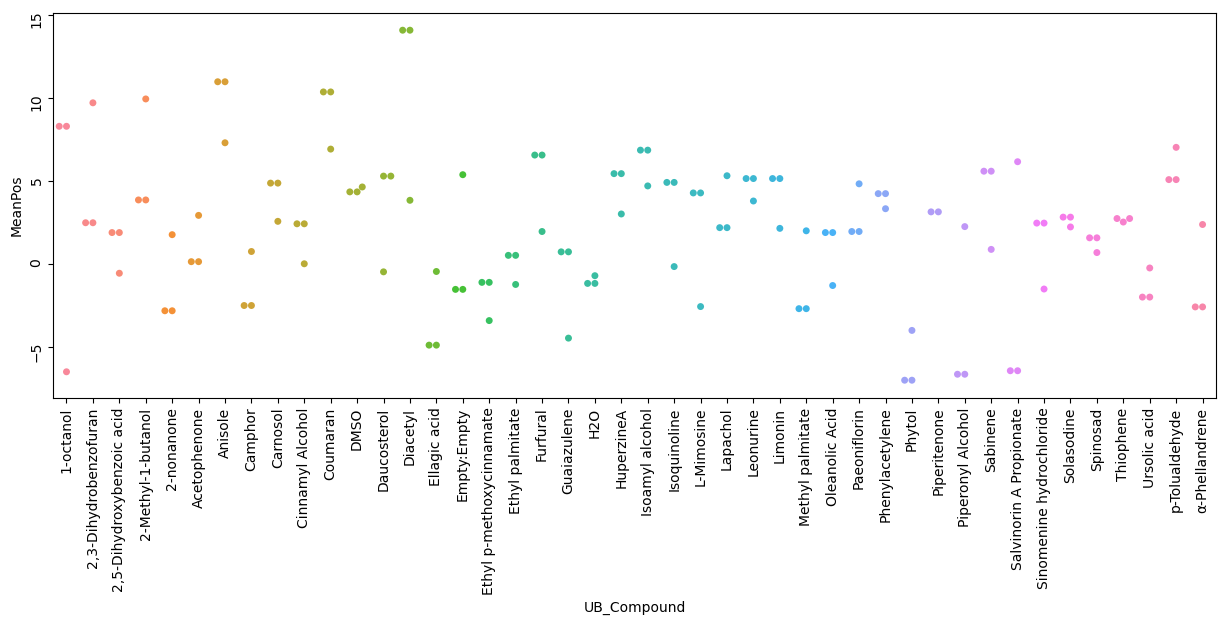

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
sns.swarmplot(data= means, x='UB_Compound', y='MeanPos')
plt.tick_params(rotation=90)

C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\dabest\plotter.py:357: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  **init_fig_kwargs)


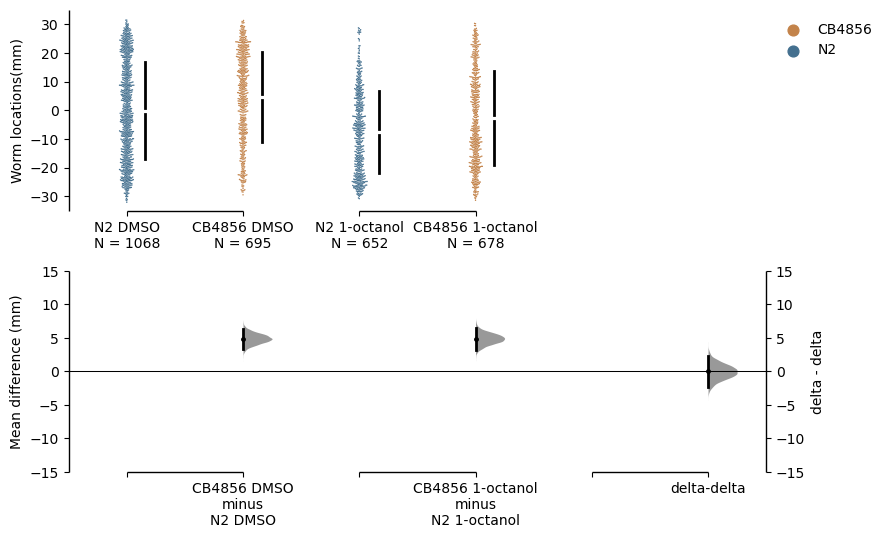

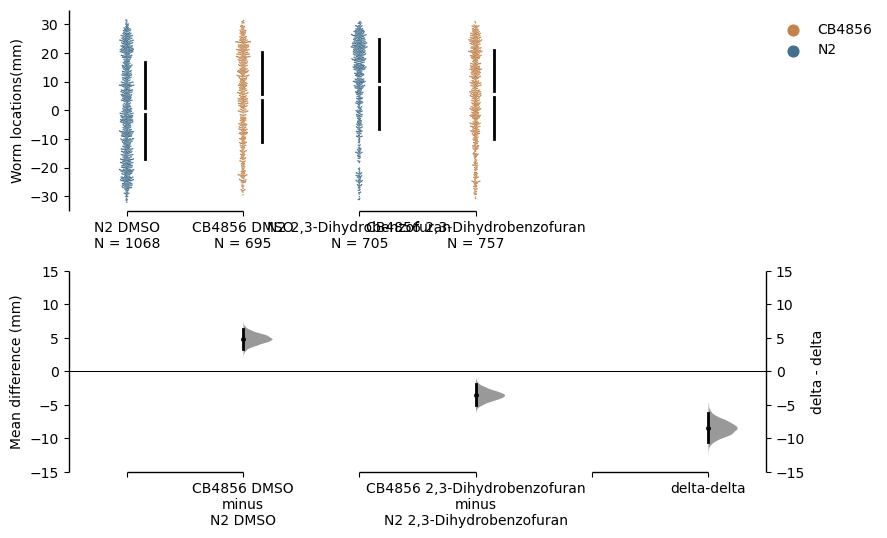

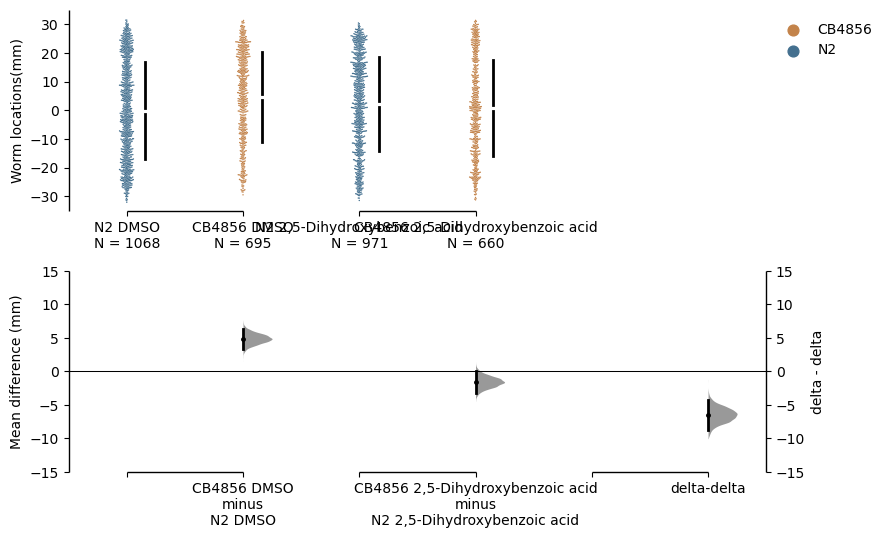

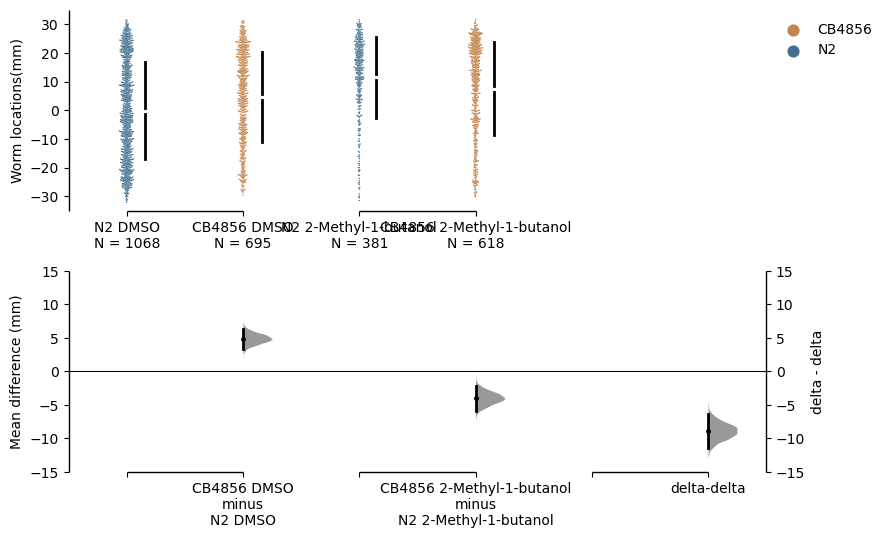

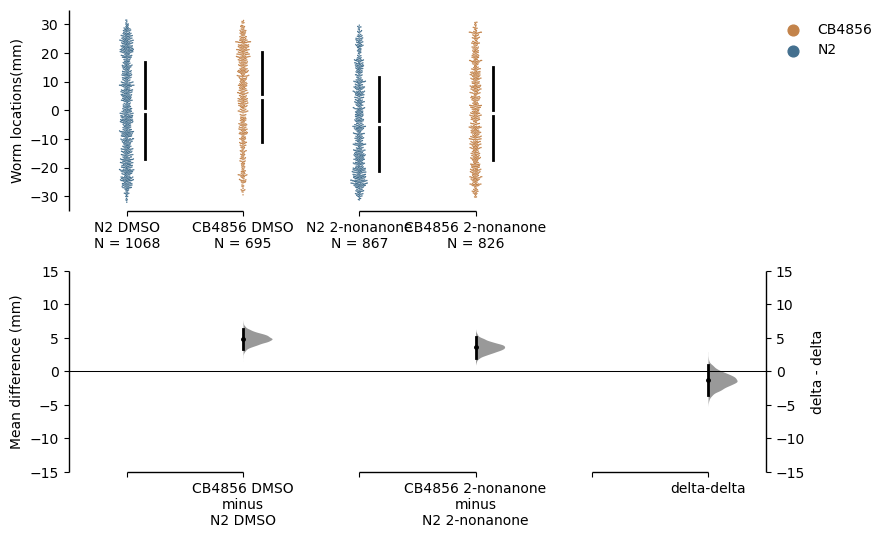

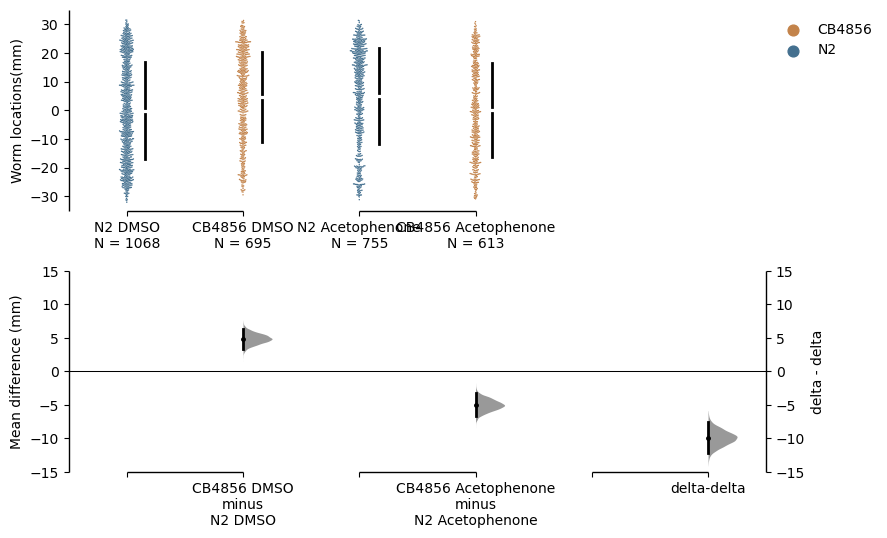

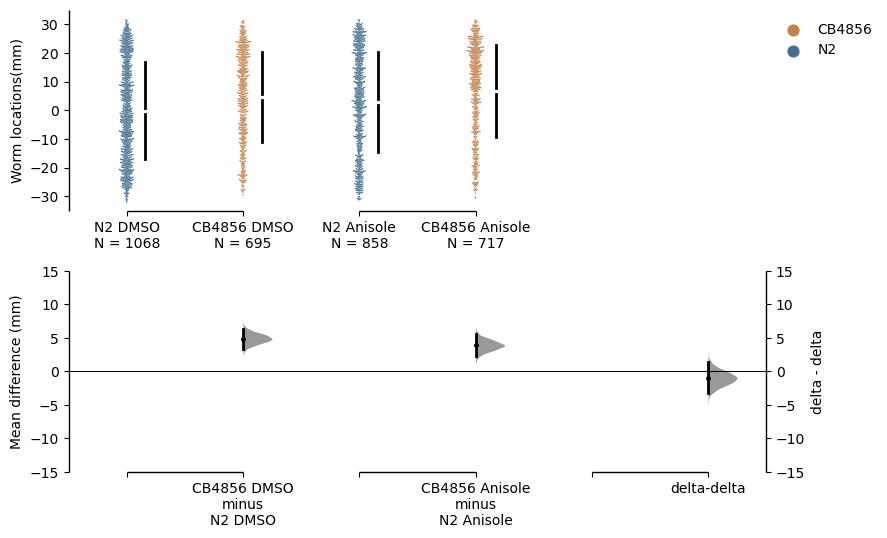

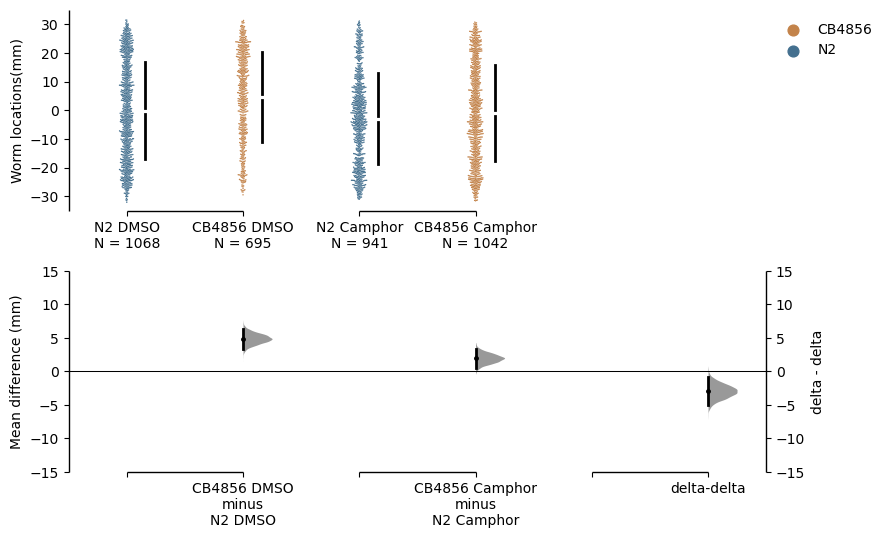

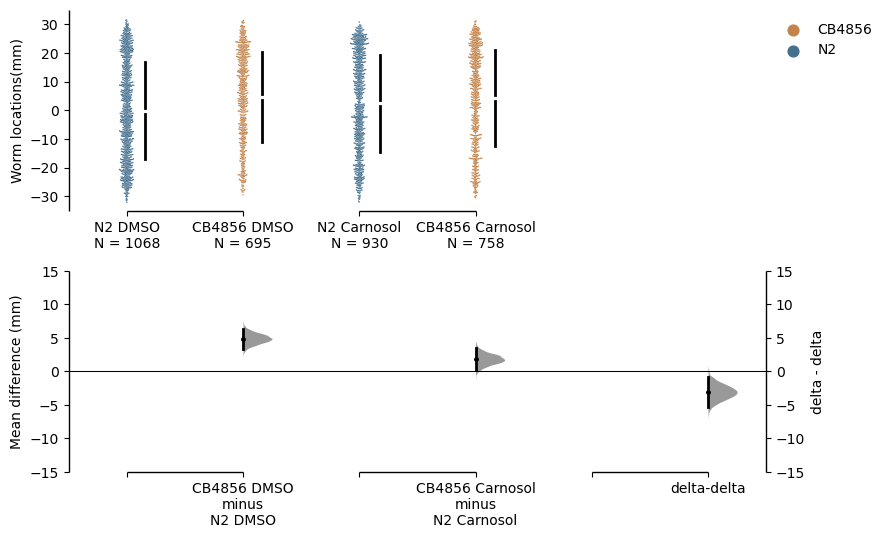

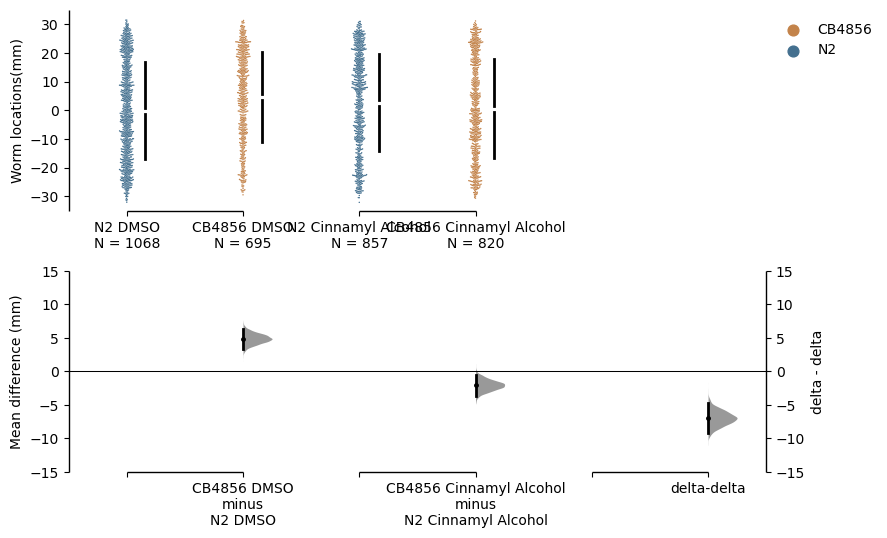

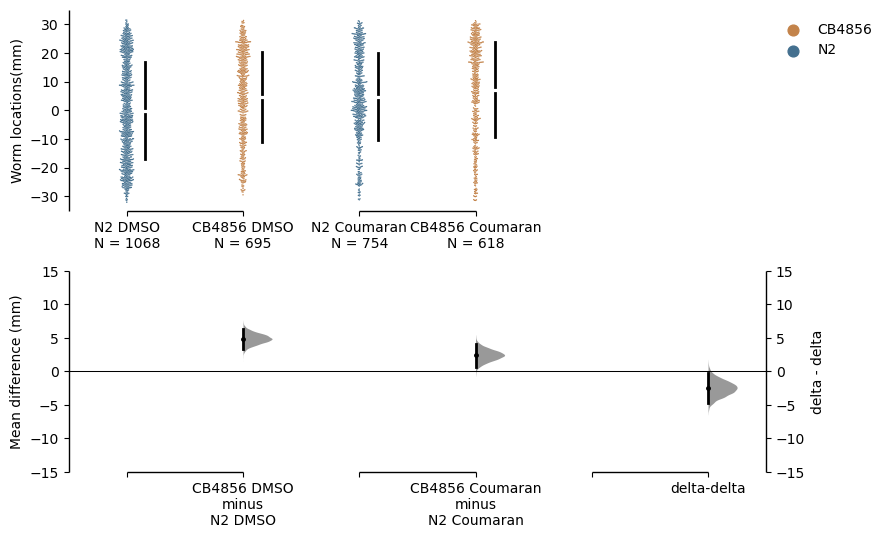

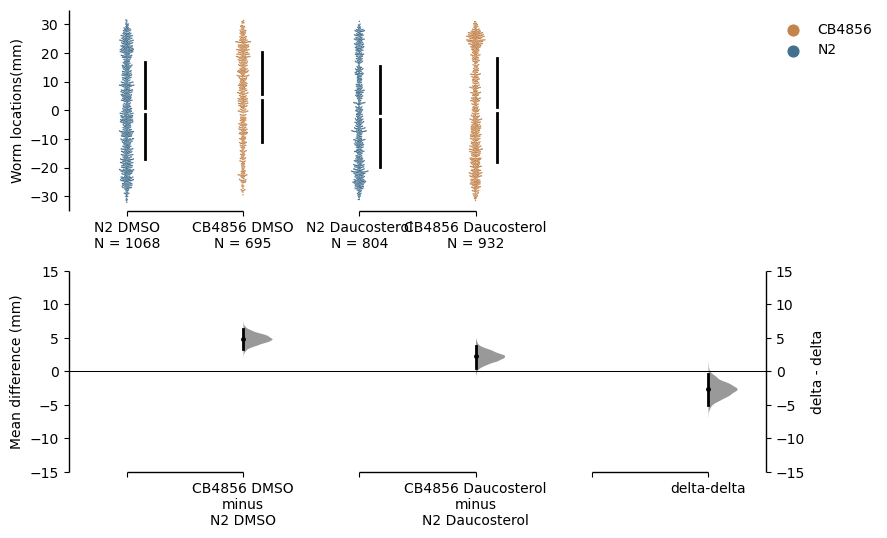

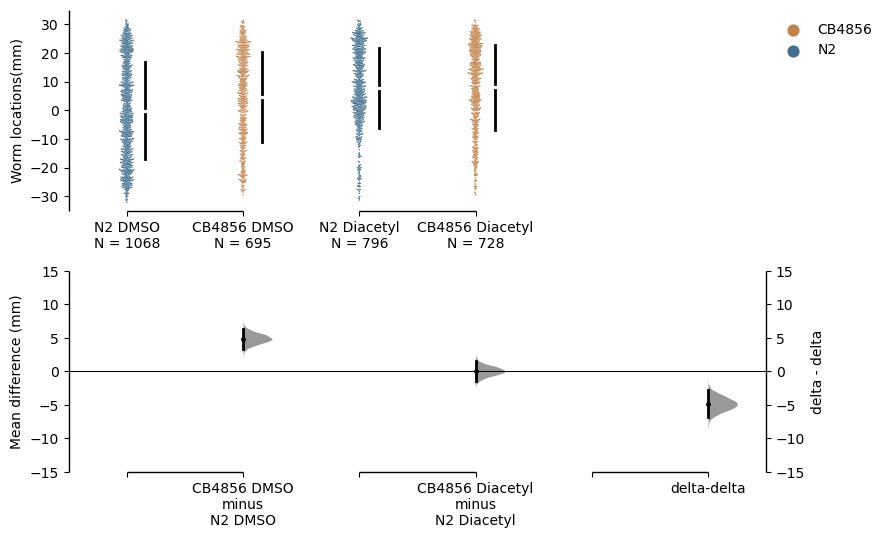

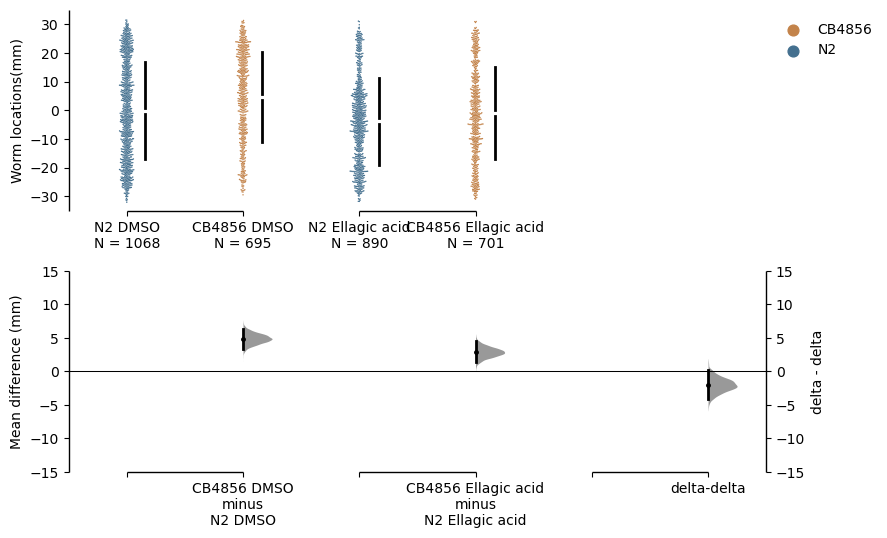

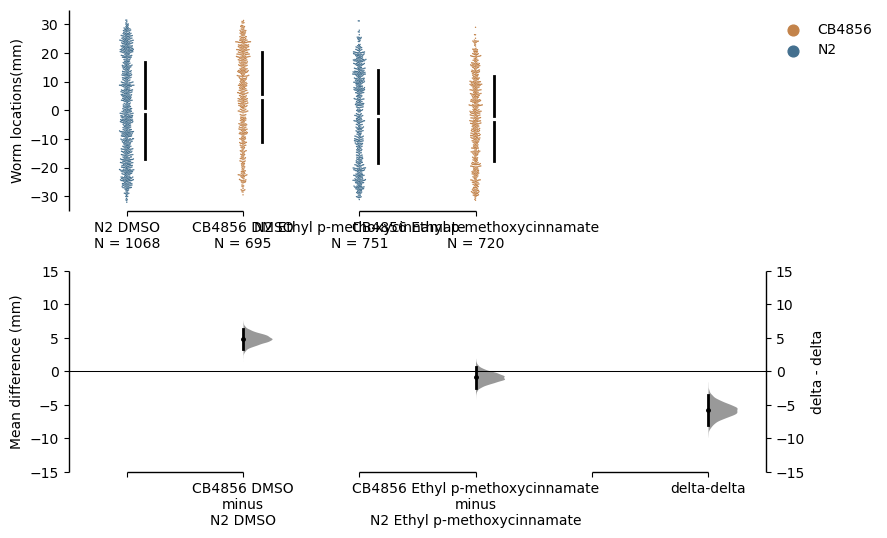

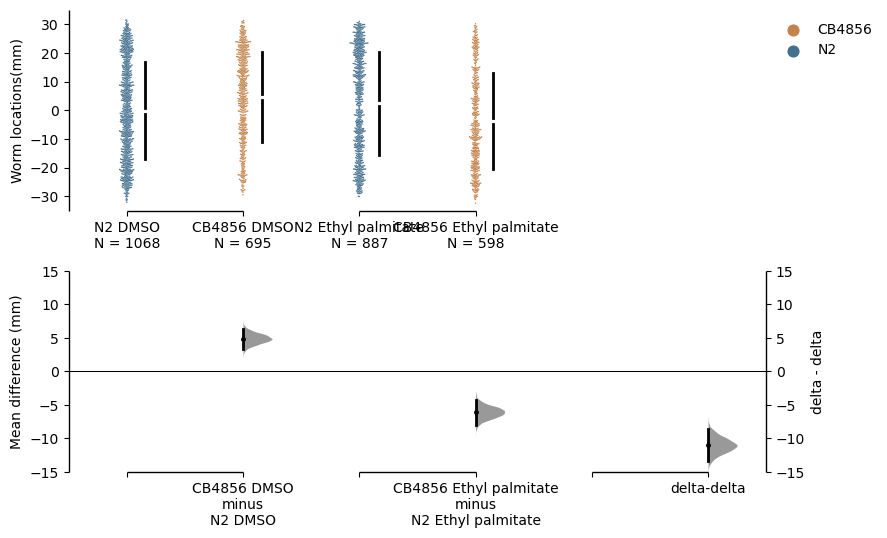

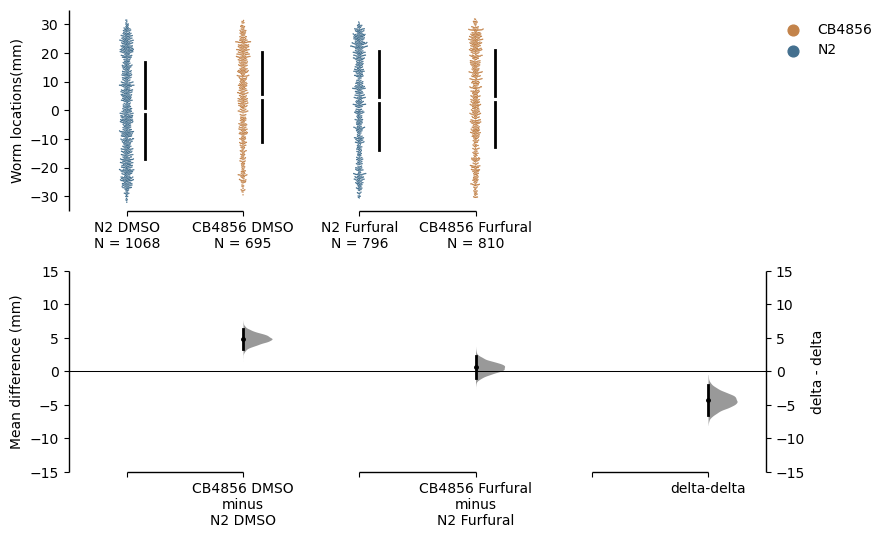

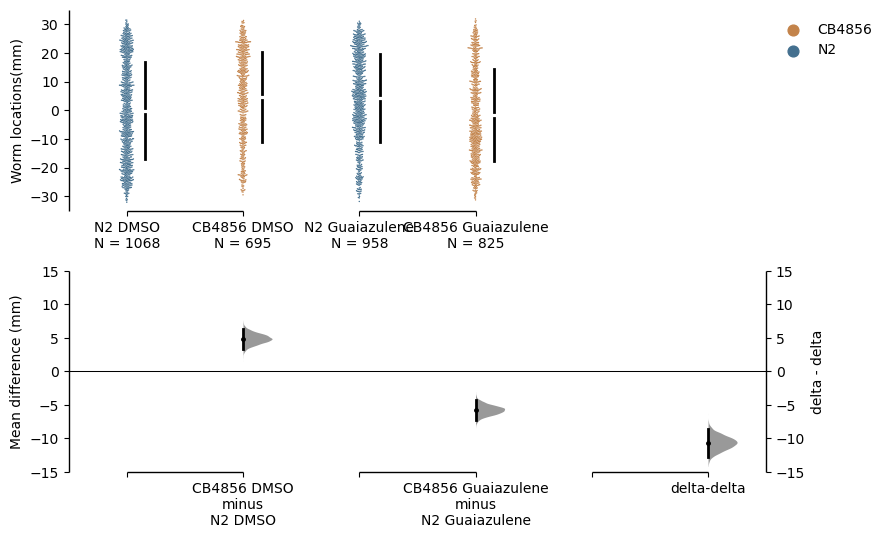

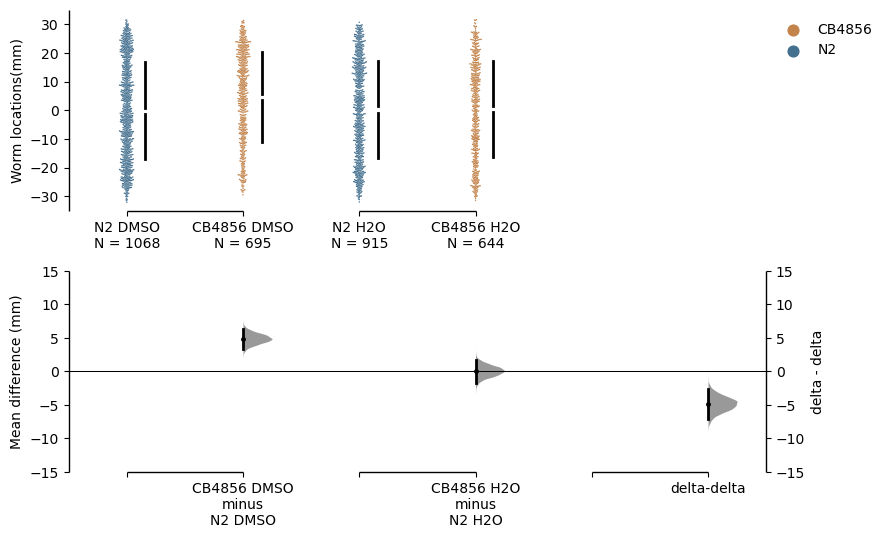

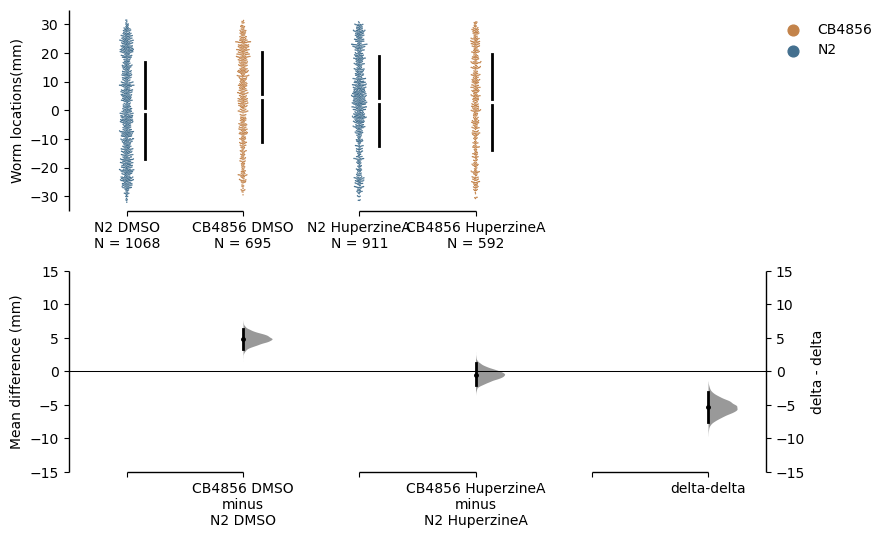

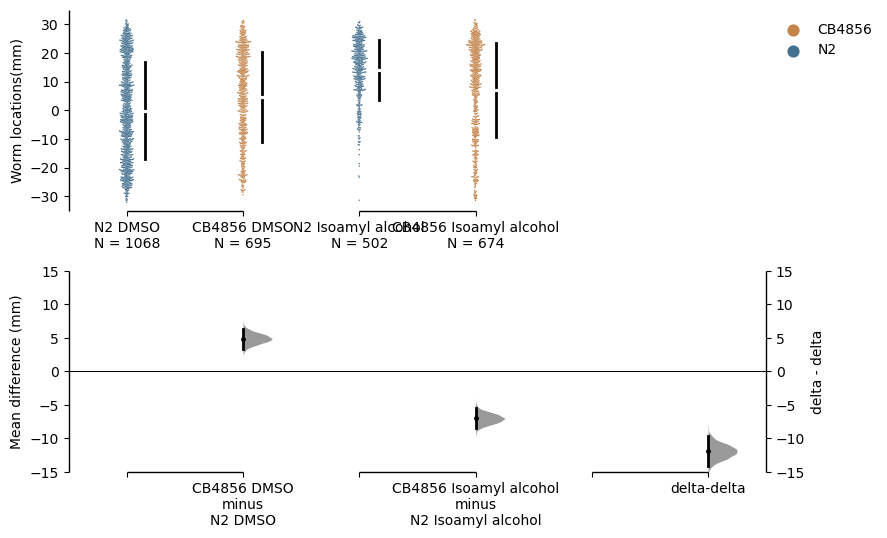

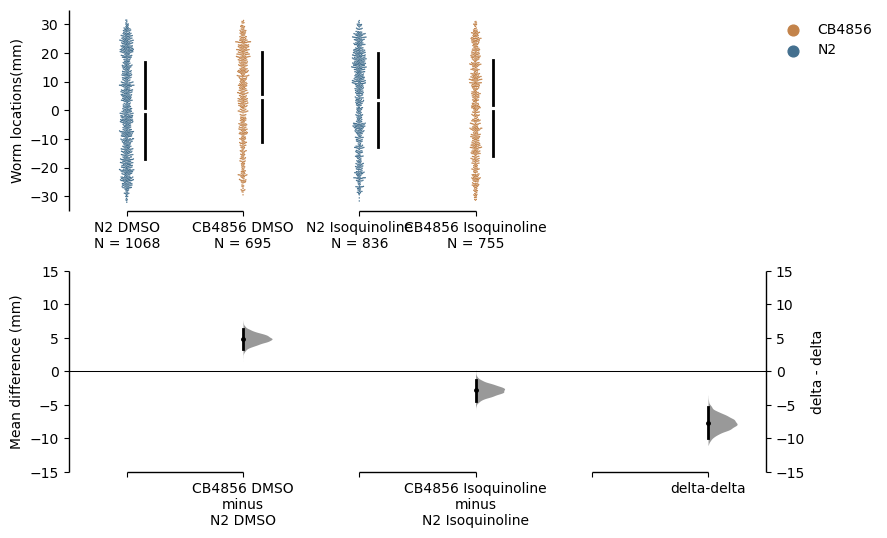

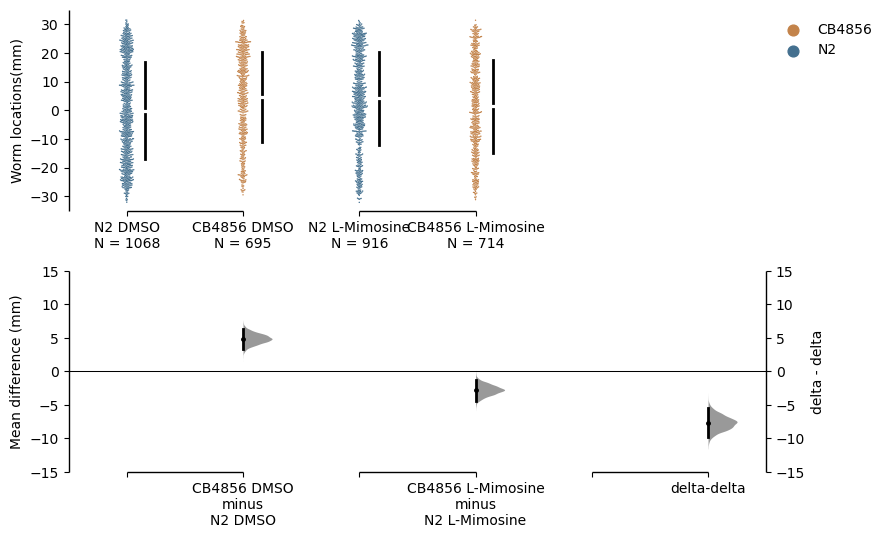

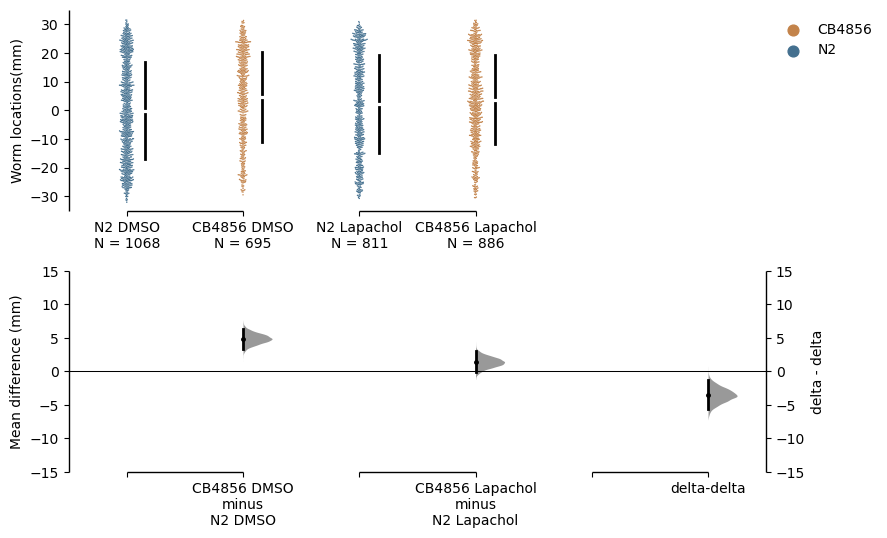

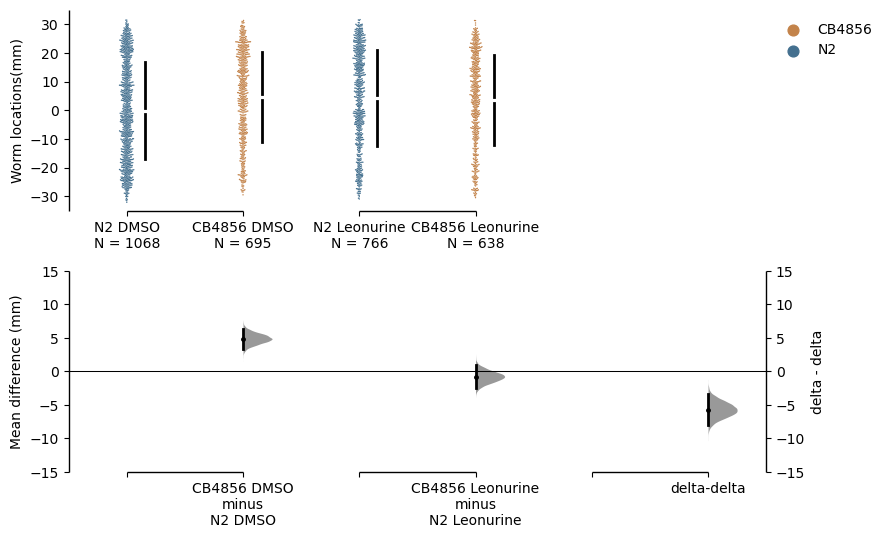

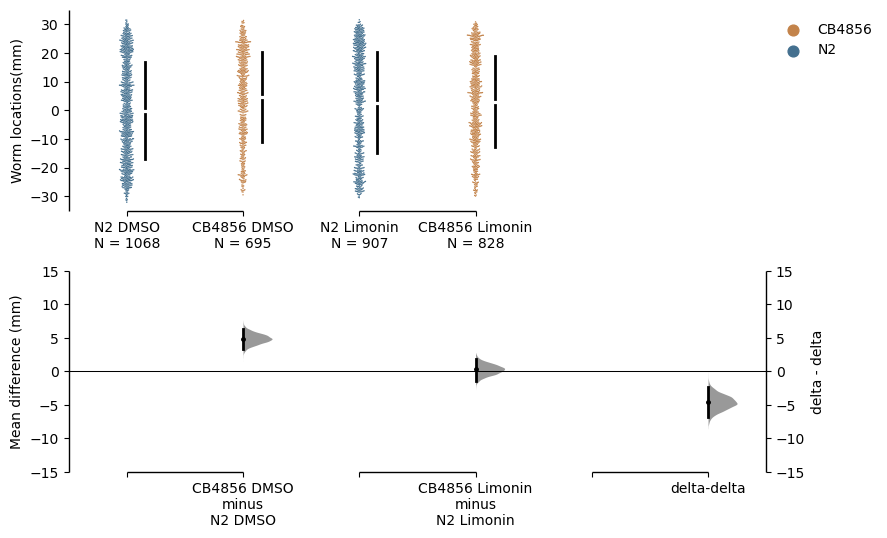

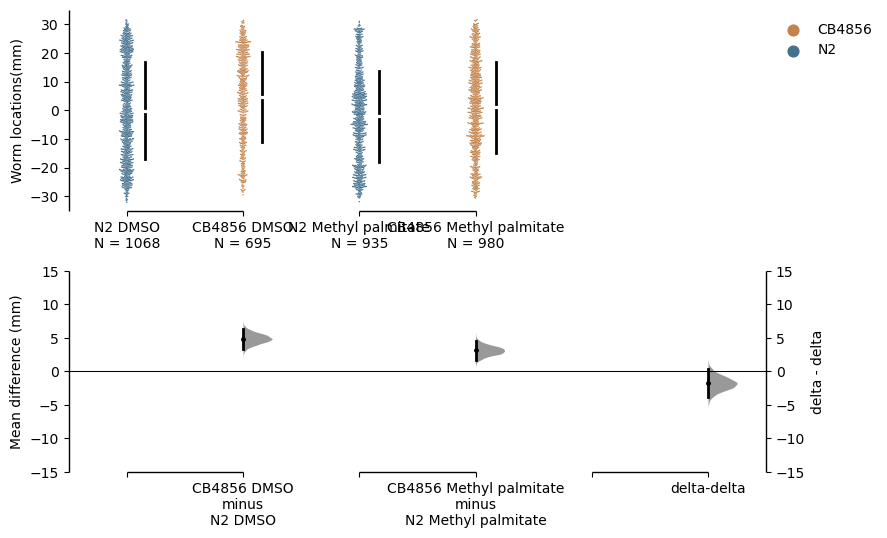

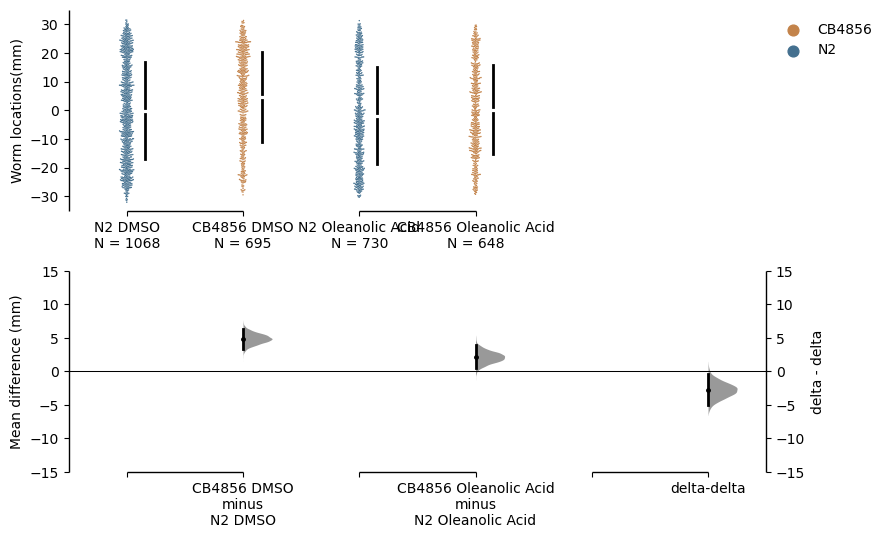

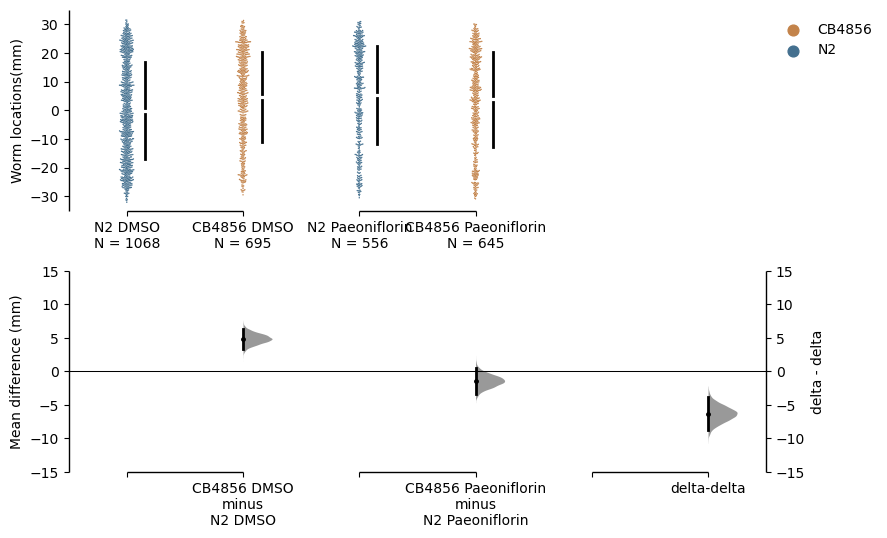

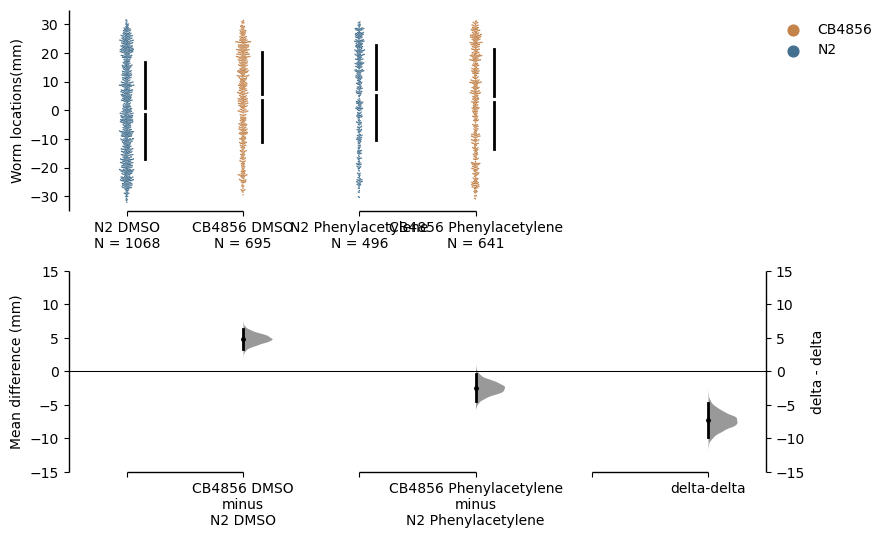

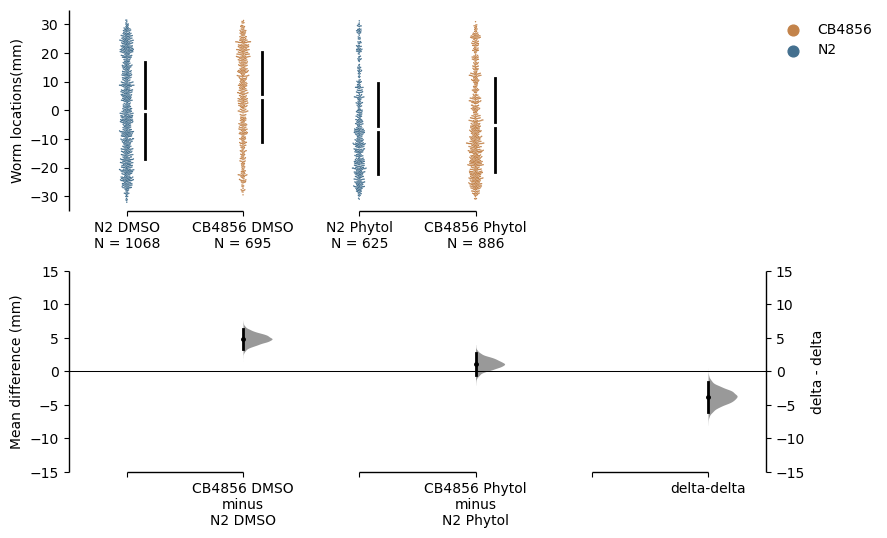

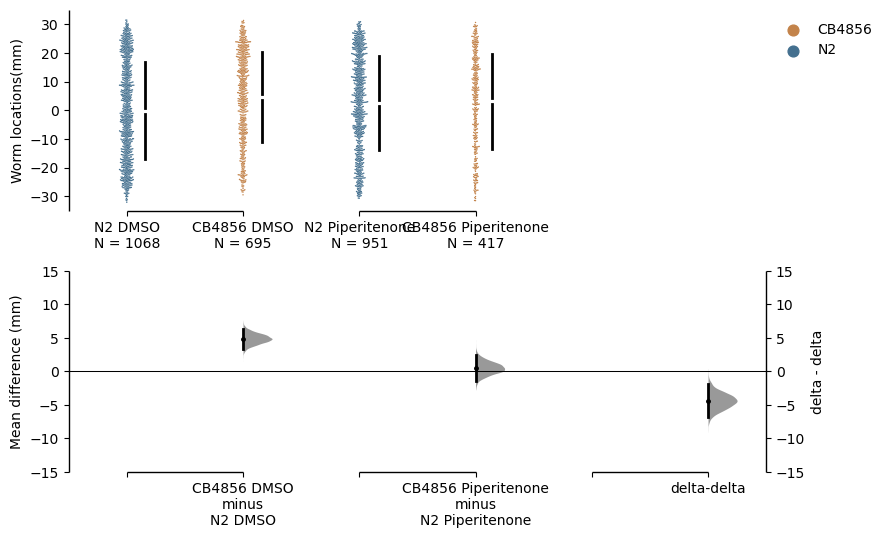

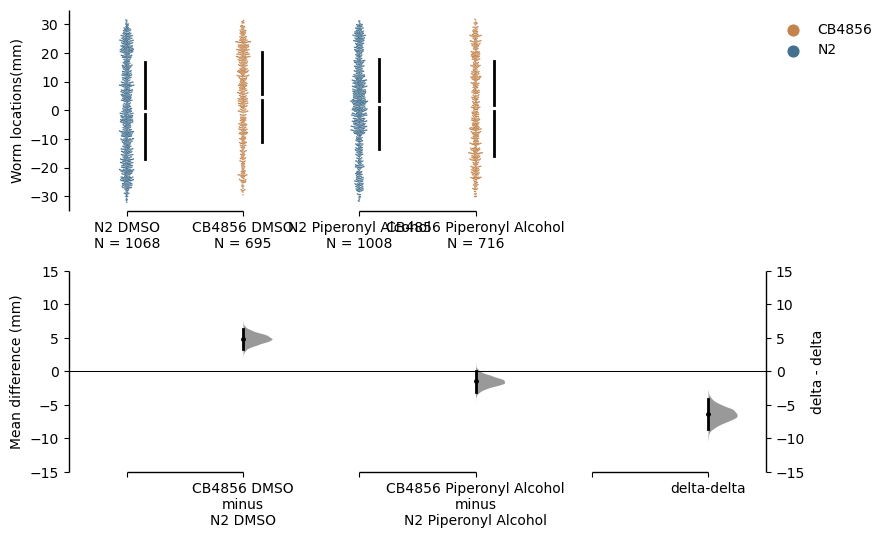

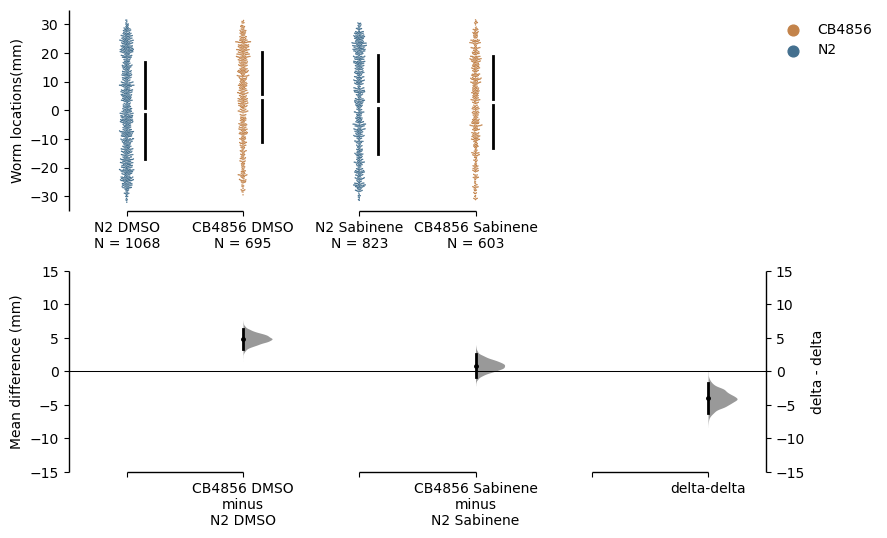

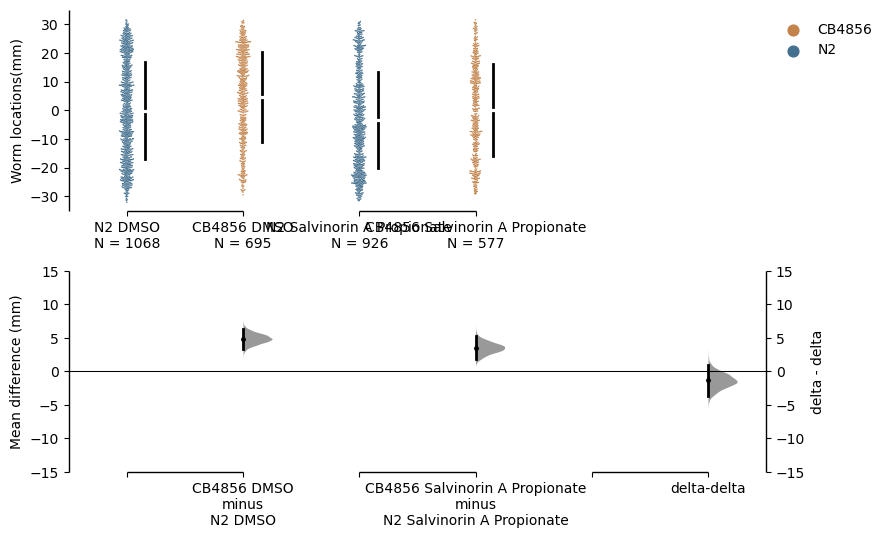

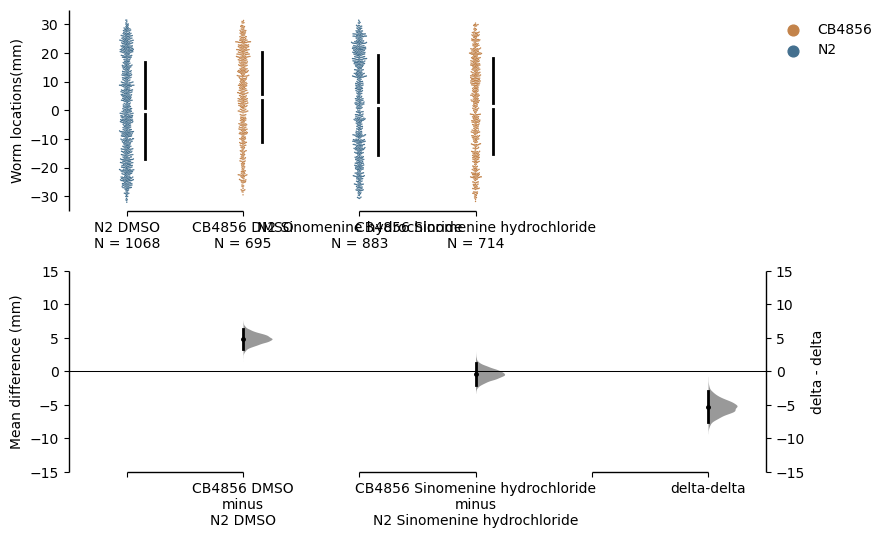

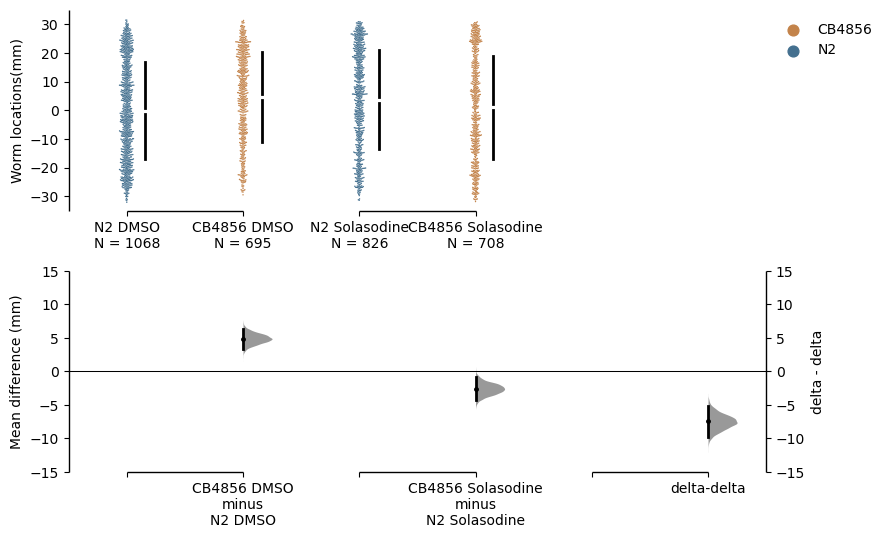

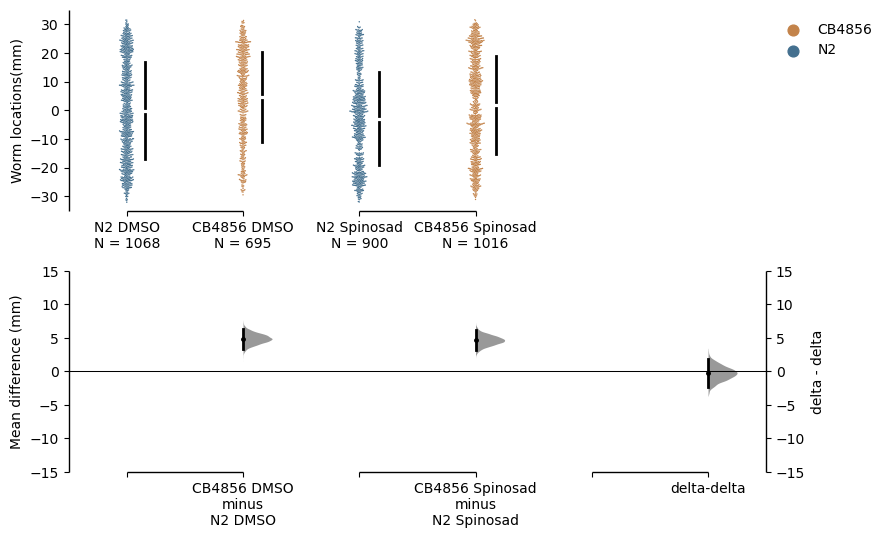

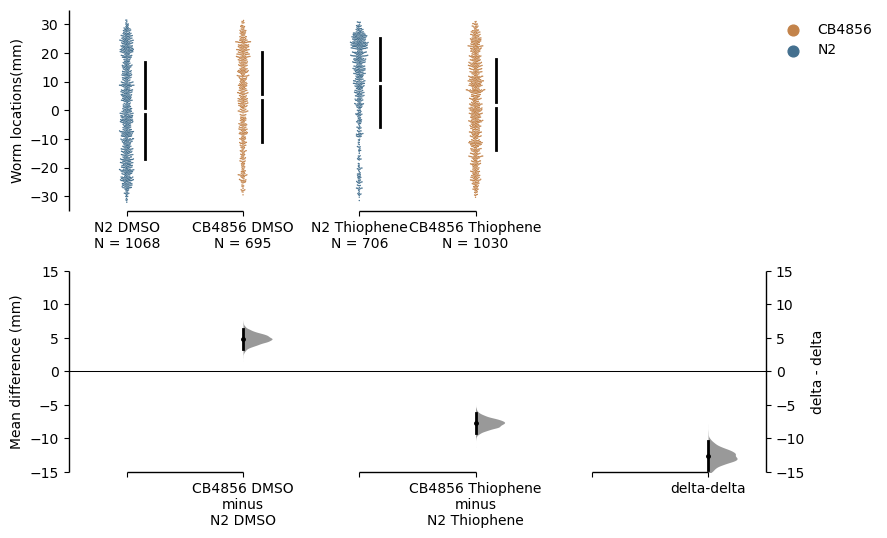

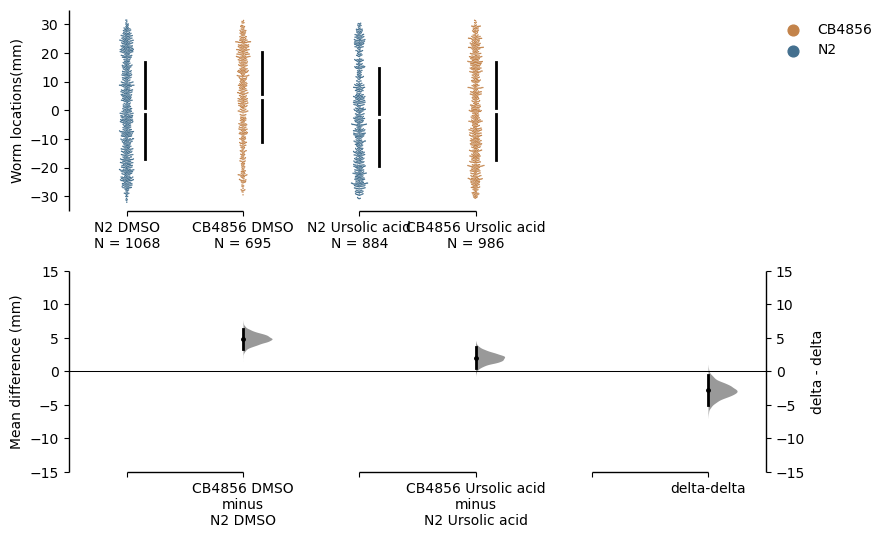

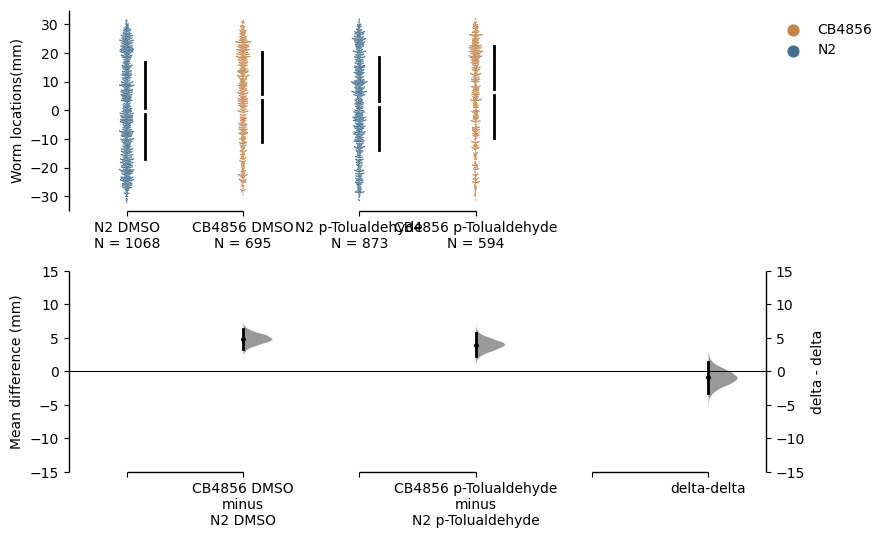

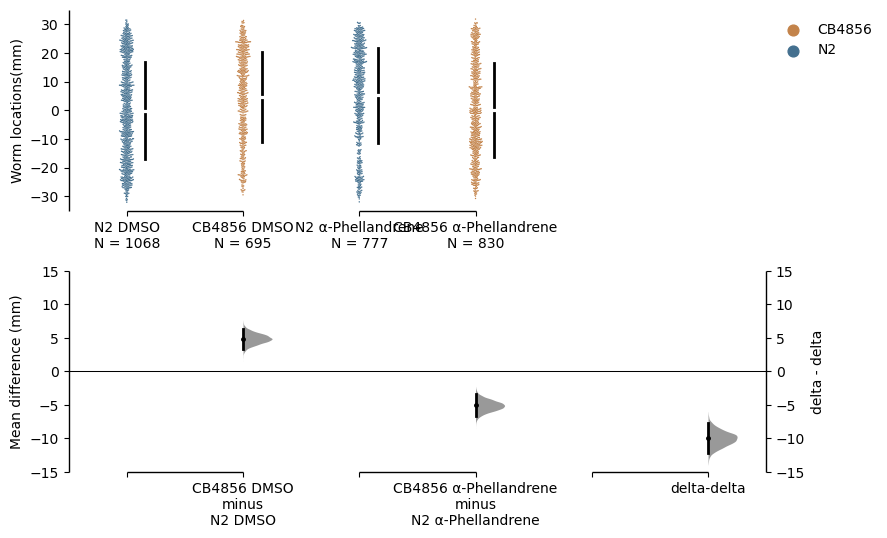

In [28]:
res = pd.DataFrame()
i=0
ssub = n2_melt.loc[(n2_melt['Strain'] == 'N2') | (n2_melt['Strain'] == 'CB4856')]
for c in scomps:
    sub = ssub.loc[(ssub['Compound']=='DMSO') | (ssub['Compound'] == c)]
    msub = means.loc[(means['UB_Compound']==c) & (means['UB_Compound']=='DMSO')]

    unpaired_delta2 = db.load(data=sub, x=['Strain', 'Strain'], y='X', delta2=True, experiment='Compound', 
                              experiment_label=['DMSO', c], x1_level = ['N2', 'CB4856'])
    ddp = unpaired_delta2.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm locations(mm)', 
                                        es_marker_size=2.5, contrast_label="Mean difference (mm)", contrast_ylim = (-15,15), swarm_ylim=(-35,35))
    
    
    rawswarm_axes = ddp.axes[0]
    contrast_axes = ddp.axes[1]
    rawswarm_axes.scatter(msub.Compound, msub.MeanPos, s=3,c='black', alpha = .5)
    
    dd = unpaired_delta2.mean_diff.delta_delta.to_dict()
    ddsub = {k: dd[k] for k in ('bca_high', 'bca_low', 'difference', 'test', 'control', )}
    ddf = pd.DataFrame(ddsub.items())
    idex = i
    ddf['idex'] = idex
    ddfp = ddf.pivot(columns=0, index='idex')
    ddfp['Strain'] = 'CB4856'
    i += 1
    res = res.append(ddfp)
#res.to_csv('/Users/Emily/Desktop/ReviewerResponses/mutVn2_dd.csv')

In [12]:
res.columns = res.columns.get_level_values(0)

In [160]:
DMSO = n2_melt.loc[n2_melt['Compound']=='DMSO']
DMSO.groupby(['Compound', 'Strain']).mean()

X
Compound Strain          
DMSO     CB4856  4.764351
         N2     -0.135551

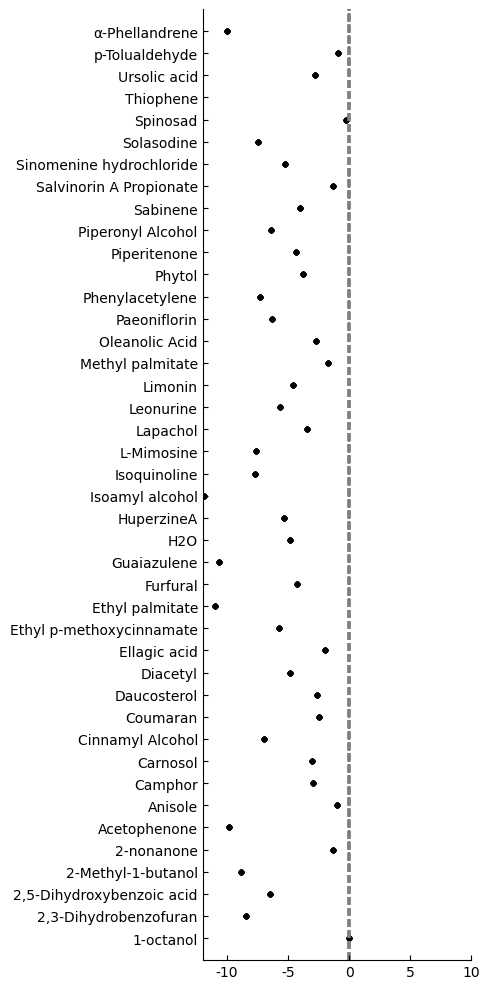

In [126]:
fig, ax = plt.subplots(figsize=(5,10)) 

positions = list(range(0, len(comps)))

lines = []

for index, row in res.iterrows():
    line = ((row['bca_low'], index), (row['bca_high'], index))
    lines.append(line)


    ytick_labels = comps

    mdiffs = list(res['difference'])

    hln_coll = mpl.collections.LineCollection(lines, colors='black', linewidths = .7)

    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    ax.axvline(0, ls='--', c='gray', zorder=1)
    #ax.fill_betweenx(positions, sub['bca_low'], sub['bca_high'], alpha=.25, joinstyle='round')
    ax.add_collection(hln_coll)
    ax.scatter(mdiffs, positions, s=8, c='black')
    ax.tick_params(axis='both', tickdir='in')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim(-12,10)    
    ax.set_ylim(-1, len(comps))


    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('C:/Users/Emily/Desktop/CB4856_screen/CB4856_cis.png', dpi=300)

In [127]:
res

0      bca_high    bca_low control difference                       test  \
idex                                                                       
136    2.243161  -2.324113    DMSO  -0.004138                  1-octanol   
137   -6.150881 -10.527292    DMSO  -8.427056      2,3-Dihydrobenzofuran   
138    -4.24779  -8.795392    DMSO  -6.458729  2,5-Dihydroxybenzoic acid   
139    -6.42061 -11.363683    DMSO  -8.887176         2-Methyl-1-butanol   
140    0.923302  -3.471403    DMSO   -1.29363                 2-nonanone   
141   -7.541122 -12.212117    DMSO  -9.884988               Acetophenone   
142    1.339018  -3.159844    DMSO  -0.988267                    Anisole   
143   -0.870286  -5.015716    DMSO  -2.938589                    Camphor   
144   -0.875504  -5.293344    DMSO  -3.084206                   Carnosol   
145   -4.661085  -9.144331    DMSO  -6.955782           Cinnamyl Alcohol   
146   -0.164837  -4.727327    DMSO  -2.466537                   Coumaran   
147   -0.412644  -4.962921    DMSO    -2.6679                Daucosterol   
148   -2.798932  -6.854176    DMSO  -4.818929                   Diacetyl   
149    0.186867   -4.11969    DMSO  -1.998899               Ellagic acid   
150   -3.551005  -8.009248    DMSO  -5.771785   Ethyl p-methoxycinnamate   
151   -8.605452 -13.353511    DMSO -11.003525            Ethyl palmitate   
152   -1.973485   -6.51354    DMSO  -4.305166                   Furfural   
153   -8.528057 -12.754271    DMSO -10.640458                Guaiazulene   
154   -2.622474  -7.166937    DMSO  -4.834033                        H2O   
155    -3.04176  -7.544415    DMSO  -5.356534                 HuperzineA   
156   -9.684419 -14.054378    DMSO -11.919808            Isoamyl alcohol   
157   -5.374703   -9.92176    DMSO  -7.712158               Isoquinoline   
158   -5.435412  -9.798018    DMSO  -7.645102                 L-Mimosine   
159   -1.264115  -5.592649    DMSO  -3.476339                   Lapachol   
160   -3.365844   -7.94426    DMSO  -5.685745                  Leonurine   
161   -2.376358  -6.806541    DMSO  -4.605015                    Limonin   
162    0.417566  -3.810067    DMSO  -1.765352           Methyl palmitate   
163    -0.41341  -5.071624    DMSO  -2.741925             Oleanolic Acid   
164   -3.889755  -8.749954    DMSO   -6.30734               Paeoniflorin   
165   -4.702741  -9.785765    DMSO  -7.321712            Phenylacetylene   
166   -1.573527  -6.083515    DMSO  -3.760541                     Phytol   
167   -1.833464  -6.785767    DMSO  -4.389777               Piperitenone   
168   -4.124036  -8.522329    DMSO  -6.389441          Piperonyl Alcohol   
169   -1.660248  -6.262804    DMSO   -4.02453                   Sabinene   
170    1.022271  -3.599631    DMSO  -1.349467    Salvinorin A Propionate   
171   -2.975237    -7.4836    DMSO  -5.278502   Sinomenine hydrochloride   
172   -5.089736   -9.74521    DMSO  -7.475225                 Solasodine   
173    1.887774  -2.346532    DMSO   -0.23229                   Spinosad   
174  -10.456307  -14.76845    DMSO -12.637088                  Thiophene   
175   -0.548421  -4.996973    DMSO  -2.829304               Ursolic acid   
176    1.464109  -3.264082    DMSO  -0.888788             p-Tolualdehyde   
177   -7.710798 -12.206001    DMSO  -9.981103             α-Phellandrene   

0             
idex          
136   CB4856  
137   CB4856  
138   CB4856  
139   CB4856  
140   CB4856  
141   CB4856  
142   CB4856  
143   CB4856  
144   CB4856  
145   CB4856  
146   CB4856  
147   CB4856  
148   CB4856  
149   CB4856  
150   CB4856  
151   CB4856  
152   CB4856  
153   CB4856  
154   CB4856  
155   CB4856  
156   CB4856  
157   CB4856  
158   CB4856  
159   CB4856  
160   CB4856  
161   CB4856  
162   CB4856  
163   CB4856  
164   CB4856  
165   CB4856  
166   CB4856  
167   CB4856  
168   CB4856  
169   CB4856  
170   CB4856  
171   CB4856  
172   CB4856  
173   CB4856  
174   CB4856  
175   CB4856  
176   CB4856  
177   CB48